In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
df = pd.read_json('tsla.json')
musk = pd.read_json('musk.json')

In [10]:
import matplotlib.pyplot as plt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2516 non-null   datetime64[ns]
 1   open            2516 non-null   float64       
 2   high            2516 non-null   float64       
 3   low             2516 non-null   float64       
 4   close           2516 non-null   float64       
 5   volume          2516 non-null   int64         
 6   rsi_7           2516 non-null   float64       
 7   rsi_14          2516 non-null   float64       
 8   cci_7           2516 non-null   float64       
 9   cci_14          2516 non-null   float64       
 10  sma_50          2516 non-null   float64       
 11  ema_50          2516 non-null   float64       
 12  sma_100         2516 non-null   float64       
 13  ema_100         2516 non-null   float64       
 14  macd            2516 non-null   float64       
 15  boll

In [12]:
df.columns

Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'next_day_close'],
      dtype='object')

coefficient: -0.0437936207908532


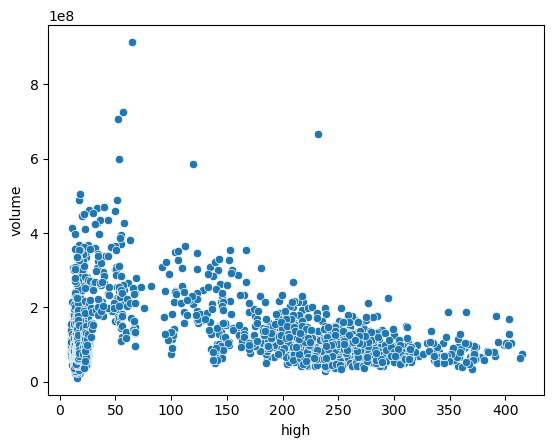

In [13]:
sns.scatterplot(data =df, x='high', y='volume')
print("coefficient:",df["volume"].corr(df['high']))

In [14]:
df["volume"].corr(df['high'])

-0.0437936207908532

In [15]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2784 non-null   datetime64[ns]
 1   Tweet Count  2784 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 43.6 KB


In [16]:
df.rename(columns = {'date':"Date"}, inplace= True)

In [17]:
merged_tsla = pd.merge(df,musk,on='Date')

In [18]:
merged_tsla.head()

,Date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,Tweet Count
0,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,...,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2
1,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,...,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,1
2,2014-01-23,11.815333,12.158667,11.561333,12.100000,118011000,81.377569,71.893773,95.675937,112.464472,...,10.224245,10.556940,9.925292,0.551802,10.479700,0.597334,0.551808,0.523853,11.640000,1
3,2014-01-30,11.866667,12.318667,11.800667,12.189333,128475000,67.795699,65.500867,135.676579,91.117968,...,10.501614,10.580413,10.099525,0.569731,10.878933,0.636667,0.580599,0.550491,12.094000,1
4,2014-02-07,12.067333,12.442000,11.973333,12.435333,133927500,67.432967,64.506920,124.186582,164.314061,...,10.814542,10.639707,10.311282,0.503743,11.484767,0.550000,0.549203,0.543070,13.104000,1


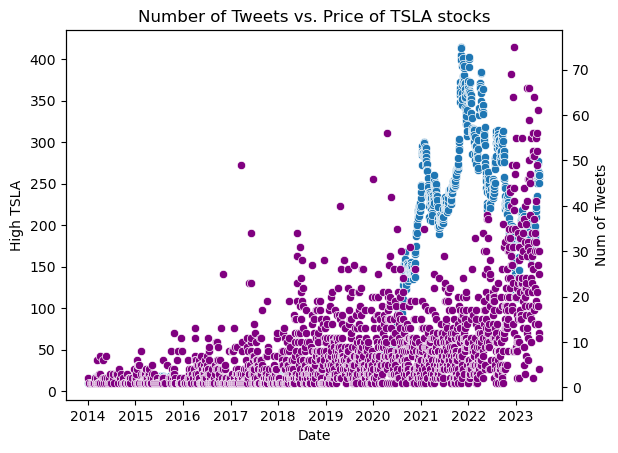

In [19]:
ax1 = sns.scatterplot(data = merged_tsla, x='Date', y = 'high')
ax2 = ax1.twinx()
sns.scatterplot(data =merged_tsla, x='Date', y = 'Tweet Count', color = 'purple')

ax1.set_ylabel('High TSLA')
ax2.set_ylabel('Num of Tweets')
plt.title('Number of Tweets vs. Price of TSLA stocks')

plt.show()